# Analyze Results from Evaluation Quickstart

This notebook analyzes the results of the evaluation quickstart.

## Setup

First, we need to import our libraries:

In [1]:
import pandas as pd
import matplotlib

In [2]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [3]:
results = pd.read_csv('build/eval-results.csv')
results.head()

,Partition,Algorithm,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,MRR
0,5,PersMean,1.439,12.694,0.824345,0.875403,0.945178,0.613601
1,4,PersMean,1.483,12.917,0.825515,0.876215,0.944550,0.615396
2,5,Custom,1.545,14.436,0.824345,0.875403,0.945178,0.614913
3,4,Custom,1.592,14.577,0.825515,0.876215,0.944550,0.613768
4,5,ItemItem,13.434,19.448,0.788612,0.833403,0.951383,0.606639


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [4]:
agg_results = results.drop(['Partition'], axis=1).groupby('Algorithm').mean()
agg_results

,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,MRR
Algorithm,,,,,,
Custom,0.9202,9.4426,0.826521,0.876860,0.944675,0.617660
ItemItem,10.4164,18.4072,0.790645,0.834773,0.951061,0.611854
PersMean,0.7774,9.0922,0.826521,0.876860,0.944675,0.617710
UserUser,0.0976,52806.3250,0.796074,0.836992,0.951285,0.712654


## Plotting Results

Let's start plotting things. What's the RMSE achieved by each algorithm?

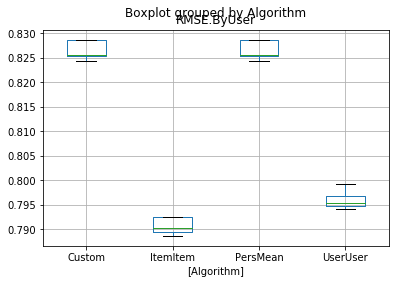

In [5]:
results.loc[:,['Algorithm', 'RMSE.ByUser']].boxplot(by='Algorithm')

Next up: nDCG

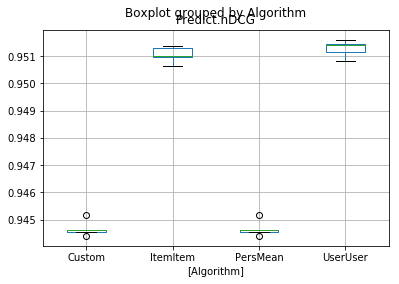

In [6]:
results.loc[:,['Algorithm', 'Predict.nDCG']].boxplot(by='Algorithm')

Finally, the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112ae9d68>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112bc06d8>], dtype=object)

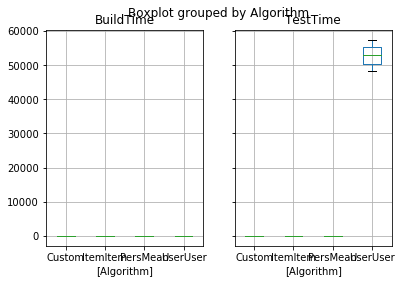

In [7]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm')